<a href="https://colab.research.google.com/github/OMGarad/Artificial-Intelligence/blob/main/OriginalAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import itertools
import csv


class CNF_Creator:
    def __init__(self,n): #n is number of symbols
        self._n = n
        self._sentence = None

    def _CreateAClause(self):
        n = self._n
        claus = random.sample(range(1,n+1),3)
        for i in range(3):
            claus[i] = -claus[i] if random.choice(range(2))==0 else claus[i]
            #above statement randomly negates some of the literals in the clause
        claus.sort()
        return claus

    def CreateRandomSentence(self,m): #m is number of clauses in the sentence
        n = self._n
        clauses = list()
        while len(clauses)<m:
            for mi in range(len(clauses),m):
                claus = self._CreateAClause()
                clauses.append(claus)
            clauses.sort()
#            print(clauses,len(clauses))
            clauses = list(clause for clause,_ in itertools.groupby(clauses)) # removes duplicate clauses
#            print(clauses,len(clauses))
            self._sentence = clauses
        return self._sentence
    
    """
    def ReadCNFfromCSVfile(self):
        with open('CNF.csv') as csvfile:
            rows = csv.reader(csvfile)
            rows = list(rows)
        sentence = [[int(i) for i in ro] for ro in rows]
        #print(sentence)
        return sentence
    """

def main():
    cnfC = CNF_Creator(n=50) # n is number of symbols 
    sentence = cnfC.CreateRandomSentence(m=350) # m is number of clauses in the sentence
    print(len(sentence))

    #sentence = cnfC.ReadCNFfromCSVfile()
    print(len(sentence))
    

In [3]:
from hashlib import new
from random import betavariate
import time

cnfC = CNF_Creator(n=50) # n is number of symbols in the 3-CNF sentence
sentence = cnfC.CreateRandomSentence(m=100) # m is number of clauses in the 3-CNF sentence  
#sentence = cnfC.ReadCNFfromCSVfile()

def GeneticAlgorithm(population):
    start_time=time.monotonic()
    frequency=0
    bestValue=0
    bestIndividual = [False for _ in range(50)]
    while(time.monotonic()-start_time<45 and fitnessFunction(bestIndividual)<1.0 and frequency<50):
        newPopulation=population[:2] 
        for i in range(len(population)-2):
            x=random.choices(population,weights=[(fitnessFunction(model)*100)**2 for model in population],k=1)[0]
            y=random.choices(population,weights=[(fitnessFunction(model)*100)**2 for model in population],k=1)[0]
            #arr=random.choices(population,weights=[(fitnessFunction(model)*100)**2 for model in population],k=4)
            #arr.sort(key=fitnessFunction,reverse=True)
            #x=arr[0]
            #y=arr[1]
            child=reproduce(x,y)
            if(frequency<=10):
                if(random.random()<0.03): #Give a small probability to mutate. 
                    child= mutate(child)
            else:
                child= mutate(child) #If it gets stuck in a local minima, then get it out by increasing mutation rate.
            newPopulation.append(child)
        newPopulation.sort(key=fitnessFunction,reverse=True)
        population=newPopulation
        bestIndividual=population[0]
        #print(fitnessFunction(bestIndividual))

        if(abs(fitnessFunction(bestIndividual)- bestValue)<0.01*bestValue):
            frequency+=1
        else:
            bestValue=fitnessFunction(bestIndividual)
            frequency=0
    return bestIndividual, time.monotonic()-start_time

def mutate(child):
    bestFFindex=-1
    bestFF=fitnessFunction(child)
    for i in range(0, 50):
        temp=child
        if(child[i]==True):
            temp[i]=False
        else:
            temp[i]=True
        if(fitnessFunction(temp)>bestFF):
            bestFFindex=i
            bestFF=fitnessFunction(temp)
    if(bestFFindex<0):
        return child
    if(child[bestFFindex]==True):
        child[bestFFindex]=False
    else:
        child[bestFFindex]=True

    return child     


def reproduce(x,y):
    maxFF=0
    maxC=0
    n=len(x)
    for c in range(0,n):
        z= x[:c] + y[c:]
        w= y[:c] + x[c:]
        if(maxFF<fitnessFunction(w) or maxFF<fitnessFunction(z)):
            maxFF= max(fitnessFunction(w), fitnessFunction(z))
            maxC=c
    
    z= x[:maxC] + y[maxC:]
    w= y[:maxC] + x[maxC:]
    if(fitnessFunction(z)>fitnessFunction(w)):
        return z
    return w

def createPopulation(k):
    pop=[]
    for i in range(0,k):
        model=[]
        for j in range(0,50):
            var= bool(random.getrandbits(1))
            model.append(var)
        pop.append(model)
        #print(model)
    return pop


def fitnessFunction(model):
    numer=0
    denom=len(sentence)
    for i in range(len(sentence)):
        for j in range(0,3):
            num=sentence[i][j]
            if((num>0 and model[num-1]==True) or (num<0 and model[(num*(-1))-1]==False)):
                numer+=1
                break

    
    fitnessValue=numer/denom
    return fitnessValue
    


#cnfC = CNF_Creator(n=50) # n is number of symbols in the 3-CNF sentence
#sentence= cnfC.CreateRandomSentence(m=100) # m is number of clauses in the 3-CNF sentence  
#sentence = cnfC.ReadCNFfromCSVfile()
#print('Random sentence : ',sentence)
#print('\nSentence from CSV file : ',sentence)

k=20

"""
population= createPopulation(k)

optimalModel, timeTaken= GeneticAlgorithm(population)

model=[]
for i in range(len(optimalModel)):
    if(optimalModel[i]==True):
        model.append(i+1)
    else:
        model.append(-(i+1))

#print(model, fitnessFunction(optimalModel)*100, time)
"""

noOfClauses=[100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
avgTimeTaken=[]
avgFFvalue=[]
for i in range(len(noOfClauses)):
    totalTime=0
    totalFF=0
    m=noOfClauses[i]
    for j in range(0,25):
        sentence= cnfC.CreateRandomSentence(m)
        population= createPopulation(k)
        itermodel, itertime= GeneticAlgorithm(population)
        totalFF+=fitnessFunction(itermodel)
        totalTime+=itertime
    print(totalTime)
    print(totalFF)
    avgTimeTaken.append(totalTime/25)
    avgFFvalue.append(totalFF/25)
print("avgFFvalues= ", avgFFvalue)
print("avgTimeTaken= ", avgTimeTaken)


#print('\n\n')
#print('Roll No : 2019A7PS1010G')
#print('Number of clauses in CSV file : ',len(sentence))
#print('Best model : ',model)
#print('Fitness value of best model : ', fitnessFunction(optimalModel)*100, '%')
#print('Time taken : ', timeTaken)
#print('\n\n')   


184.56693423300004
24.829999999999995
270.7623312989999
24.683333333333334
417.5095562599994
24.442857142857143
486.2510609230005
24.5
552.3871956030007
24.477777777777774
647.351655256
24.384999999999998
666.4818674389999
24.26818181818182
757.5191255109999
24.133333333333336
793.350394060999
24.057692307692303
862.825886724002
24.103571428571424
925.5954757409945
23.97333333333333
avgFFvalues=  [0.9931999999999997, 0.9873333333333334, 0.9777142857142858, 0.98, 0.9791111111111109, 0.9753999999999999, 0.9707272727272728, 0.9653333333333335, 0.9623076923076921, 0.964142857142857, 0.9589333333333332]
avgTimeTaken=  [7.382677369320001, 10.830493251959997, 16.700382250399976, 19.45004243692002, 22.095487824120028, 25.89406621024, 26.659274697559994, 30.300765020439993, 31.73401576243996, 34.51303546896008, 37.02381902963978]


In [4]:
import matplotlib.pyplot as plt


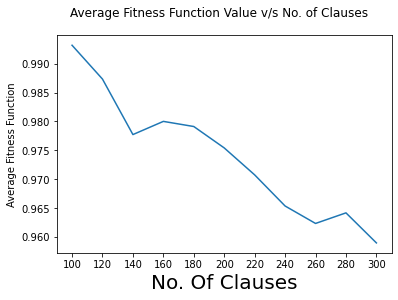

In [7]:
# set up a plot with dummy data
fig, ax = plt.subplots()
x = [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
y = avgFFvalue
ax.plot(x,y)

# title and labels, setting initial sizes
fig.suptitle('Average Fitness Function Value v/s No. of Clauses', fontsize=12)
ax.set_xlabel('No. Of Clauses', fontsize=10)
ax.set_ylabel('Average Fitness Function', fontsize='medium')   

# setting label sizes after creation
ax.xaxis.label.set_size(20)
plt.xticks([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
plt.draw()

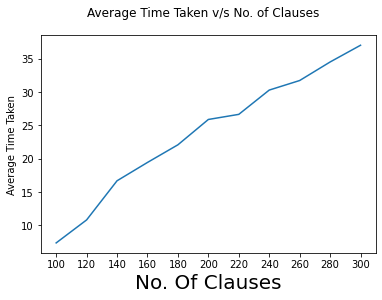

In [8]:
# set up a plot with dummy data
fig, ax = plt.subplots()
x = [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
y = avgTimeTaken
ax.plot(x,y)

# title and labels, setting initial sizes
fig.suptitle('Average Time Taken v/s No. of Clauses', fontsize=12)
ax.set_xlabel('No. Of Clauses', fontsize=10)
ax.set_ylabel('Average Time Taken', fontsize='medium')   

# setting label sizes after creation
ax.xaxis.label.set_size(20)
plt.xticks([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
plt.draw()